# Veri bilimi uzmanlaranın maaş hesaplayan model

In [18]:
import pandas as pd
import numpy as np
import re  # re modülünü içe aktarıyoruz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [19]:
# veri setinin yüklenmesi
df = pd.read_csv(r'C:\Users\realb\Desktop\veri bilimi uzmanı maaşları/Data-Science-Job_Listing.csv')

In [20]:
df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [21]:
df.tail()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
495,496,Cloud Administrator,GM Financial\n4.0,"Arlington, TX",NaN,25d,https://media.glassdoor.com/sql/488523/gm-fina...,https://www.glassdoor.com/partner/jobListing.h...,4.0
496,497,Robotics Engineer (AI),Alpha Net Consulting,United States,$44.12 - $70.00 Per Hour (Employer est.),4d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
497,498,Tchr of English- Newark School of Data Science...,Newark Board of Education\n3.3,"Newark, NJ",$62K - $107K (Employer est.),30d+,https://media.glassdoor.com/sql/137673/newark-...,https://www.glassdoor.com/partner/jobListing.h...,3.3
498,499,Statistician,Sciome LLC,"Research Triangle Park, NC",$33.00 - $39.00 Per Hour (Employer est.),30d+,https://media.glassdoor.com/sql/2418223/sciome...,https://www.glassdoor.com/partner/jobListing.h...,NaN
499,500,Quantitative Analytics Manager - Data Modeling...,Freddie Mac\n3.6,"McLean, VA",$140K - $210K (Employer est.),5d,https://media.glassdoor.com/sql/1585/freddie-m...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [22]:
print(df.isna().sum())


Position           0
Job Title          0
Company Name       0
Location           0
Salary            62
Date               0
Logo              64
Job Link           0
Company Rating    61
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  439 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [24]:
# Maaşı temizlemek ve tek bir sayısal değere dönüştürmek için fonksiyon
def clean_salary(salary):
    if isinstance(salary, str):  # Sadece string olan değerleri işle
        # Sayısal olmayan karakterleri "-" hariç kaldır
        salary = re.sub(r'[^\d\-]', '', salary)
        
        # Eğer maaş bir aralık ise, ortalamasını al
        if '-' in salary:
            min_salary, max_salary = map(int, salary.split('-'))
            return (min_salary + max_salary) / 2
        else:
            return float(salary)
    return np.nan  # String olmayan değerler için NaN döndür

In [55]:
# Kategorik değişkenleri kodlayın
categorical_columns = ['Position', 'Job Title', 'Company Name', 'Location', 'Date', 'Logo', 'Job Link']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [56]:
# Verileri özelliklere ve hedefe ayırın
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

In [57]:
# Sayısal değişkenleri normalleştirin
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
# Verileri eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [59]:
# ANN modelini kurma
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [60]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [61]:
# Train the model
history = model.fit(X_train, y_train, epochs=450, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Mean Absolute Error: {mae}")

# Predictions
y_pred = model.predict(X_test)

Epoch 1/450
10/10 [==============================] - 1s 13ms/step - loss: 2144644.0000 - mean_absolute_error: 609.6011 - val_loss: 3030731.7500 - val_mean_absolute_error: 730.8026
Epoch 2/450
10/10 [==============================] - 0s 4ms/step - loss: 2140401.0000 - mean_absolute_error: 606.5991 - val_loss: 3027515.5000 - val_mean_absolute_error: 728.8884
Epoch 3/450
10/10 [==============================] - 0s 4ms/step - loss: 2130882.5000 - mean_absolute_error: 601.1079 - val_loss: 3021890.0000 - val_mean_absolute_error: 726.0414
Epoch 4/450
10/10 [==============================] - 0s 5ms/step - loss: 2110706.0000 - mean_absolute_error: 589.8192 - val_loss: 3012197.2500 - val_mean_absolute_error: 721.7877
Epoch 5/450
10/10 [==============================] - 0s 4ms/step - loss: 2068323.3750 - mean_absolute_error: 567.0796 - val_loss: 2994116.0000 - val_mean_absolute_error: 715.2044
Epoch 6/450
10/10 [==============================] - 0s 4ms/step - loss: 1974655.6250 - mean_absolute_er

10/10 [==============================] - 0s 4ms/step - loss: 66.7017 - mean_absolute_error: 2.9609 - val_loss: 1876645.7500 - val_mean_absolute_error: 590.8048
Epoch 48/450
10/10 [==============================] - 0s 4ms/step - loss: 47.9088 - mean_absolute_error: 2.4037 - val_loss: 1877227.2500 - val_mean_absolute_error: 590.8195
Epoch 49/450
10/10 [==============================] - 0s 4ms/step - loss: 81.9304 - mean_absolute_error: 3.0159 - val_loss: 1876743.2500 - val_mean_absolute_error: 590.8285
Epoch 50/450
10/10 [==============================] - 0s 4ms/step - loss: 86.8533 - mean_absolute_error: 2.8219 - val_loss: 1876052.6250 - val_mean_absolute_error: 590.7345
Epoch 51/450
10/10 [==============================] - 0s 4ms/step - loss: 94.5285 - mean_absolute_error: 3.2036 - val_loss: 1876397.7500 - val_mean_absolute_error: 590.7892
Epoch 52/450
10/10 [==============================] - 0s 4ms/step - loss: 61.0111 - mean_absolute_error: 2.8018 - val_loss: 1877203.2500 - val_mean_

10/10 [==============================] - 0s 4ms/step - loss: 154.7599 - mean_absolute_error: 5.1913 - val_loss: 1875565.2500 - val_mean_absolute_error: 591.7109
Epoch 95/450
10/10 [==============================] - 0s 4ms/step - loss: 167.1732 - mean_absolute_error: 5.1210 - val_loss: 1875115.2500 - val_mean_absolute_error: 591.5272
Epoch 96/450
10/10 [==============================] - 0s 4ms/step - loss: 93.9276 - mean_absolute_error: 4.3893 - val_loss: 1875734.0000 - val_mean_absolute_error: 592.3198
Epoch 97/450
10/10 [==============================] - 0s 4ms/step - loss: 103.8848 - mean_absolute_error: 5.1670 - val_loss: 1874921.6250 - val_mean_absolute_error: 591.5674
Epoch 98/450
10/10 [==============================] - 0s 4ms/step - loss: 86.4543 - mean_absolute_error: 5.3204 - val_loss: 1875985.6250 - val_mean_absolute_error: 592.2469
Epoch 99/450
10/10 [==============================] - 0s 4ms/step - loss: 115.4869 - mean_absolute_error: 5.8462 - val_loss: 1874940.7500 - val_m

Epoch 141/450
10/10 [==============================] - 0s 4ms/step - loss: 233.3043 - mean_absolute_error: 10.2446 - val_loss: 1869622.0000 - val_mean_absolute_error: 592.8405
Epoch 142/450
10/10 [==============================] - 0s 4ms/step - loss: 202.6525 - mean_absolute_error: 9.5997 - val_loss: 1871918.3750 - val_mean_absolute_error: 594.9700
Epoch 143/450
10/10 [==============================] - 0s 4ms/step - loss: 237.2497 - mean_absolute_error: 10.3604 - val_loss: 1870888.6250 - val_mean_absolute_error: 592.9850
Epoch 144/450
10/10 [==============================] - 0s 4ms/step - loss: 277.9370 - mean_absolute_error: 10.8494 - val_loss: 1872674.0000 - val_mean_absolute_error: 594.7723
Epoch 145/450
10/10 [==============================] - 0s 4ms/step - loss: 249.8964 - mean_absolute_error: 10.8326 - val_loss: 1869104.2500 - val_mean_absolute_error: 592.1649
Epoch 146/450
10/10 [==============================] - 0s 4ms/step - loss: 249.6210 - mean_absolute_error: 10.1103 - val_

Epoch 188/450
10/10 [==============================] - 0s 4ms/step - loss: 328.0909 - mean_absolute_error: 11.3693 - val_loss: 1871691.6250 - val_mean_absolute_error: 595.3604
Epoch 189/450
10/10 [==============================] - 0s 4ms/step - loss: 366.5548 - mean_absolute_error: 11.2899 - val_loss: 1867527.7500 - val_mean_absolute_error: 592.8556
Epoch 190/450
10/10 [==============================] - 0s 4ms/step - loss: 439.0589 - mean_absolute_error: 12.4174 - val_loss: 1874416.7500 - val_mean_absolute_error: 597.0939
Epoch 191/450
10/10 [==============================] - 0s 4ms/step - loss: 479.7615 - mean_absolute_error: 13.6991 - val_loss: 1871410.3750 - val_mean_absolute_error: 593.2858
Epoch 192/450
10/10 [==============================] - 0s 4ms/step - loss: 545.4926 - mean_absolute_error: 14.0562 - val_loss: 1875025.0000 - val_mean_absolute_error: 596.9385
Epoch 193/450
10/10 [==============================] - 0s 4ms/step - loss: 683.1823 - mean_absolute_error: 15.2728 - val

Epoch 235/450
10/10 [==============================] - 0s 4ms/step - loss: 1.8731 - mean_absolute_error: 0.4007 - val_loss: 1870927.6250 - val_mean_absolute_error: 593.5535
Epoch 236/450
10/10 [==============================] - 0s 4ms/step - loss: 1.0618 - mean_absolute_error: 0.4159 - val_loss: 1870885.7500 - val_mean_absolute_error: 593.5031
Epoch 237/450
10/10 [==============================] - 0s 4ms/step - loss: 3.4158 - mean_absolute_error: 0.3870 - val_loss: 1870960.7500 - val_mean_absolute_error: 593.5162
Epoch 238/450
10/10 [==============================] - 0s 4ms/step - loss: 0.6229 - mean_absolute_error: 0.3286 - val_loss: 1871063.2500 - val_mean_absolute_error: 593.6398
Epoch 239/450
10/10 [==============================] - 0s 4ms/step - loss: 3.5405 - mean_absolute_error: 0.4611 - val_loss: 1870831.2500 - val_mean_absolute_error: 593.4749
Epoch 240/450
10/10 [==============================] - 0s 4ms/step - loss: 1.7970 - mean_absolute_error: 0.4169 - val_loss: 1870956.375

10/10 [==============================] - 0s 4ms/step - loss: 7.7180 - mean_absolute_error: 0.8621 - val_loss: 1870961.3750 - val_mean_absolute_error: 593.5446
Epoch 283/450
10/10 [==============================] - 0s 4ms/step - loss: 4.0755 - mean_absolute_error: 0.7132 - val_loss: 1870882.2500 - val_mean_absolute_error: 593.4803
Epoch 284/450
10/10 [==============================] - 0s 4ms/step - loss: 5.4082 - mean_absolute_error: 0.7210 - val_loss: 1870908.7500 - val_mean_absolute_error: 593.5894
Epoch 285/450
10/10 [==============================] - 0s 4ms/step - loss: 6.2224 - mean_absolute_error: 0.7928 - val_loss: 1871014.7500 - val_mean_absolute_error: 593.4783
Epoch 286/450
10/10 [==============================] - 0s 4ms/step - loss: 3.9089 - mean_absolute_error: 0.6978 - val_loss: 1870900.6250 - val_mean_absolute_error: 593.5308
Epoch 287/450
10/10 [==============================] - 0s 4ms/step - loss: 3.6232 - mean_absolute_error: 0.7080 - val_loss: 1870807.2500 - val_mean_a

Epoch 329/450
10/10 [==============================] - 0s 4ms/step - loss: 171.6945 - mean_absolute_error: 7.6277 - val_loss: 1873518.3750 - val_mean_absolute_error: 591.8013
Epoch 330/450
10/10 [==============================] - 0s 4ms/step - loss: 195.6577 - mean_absolute_error: 7.7844 - val_loss: 1873080.3750 - val_mean_absolute_error: 590.6206
Epoch 331/450
10/10 [==============================] - 0s 4ms/step - loss: 222.0281 - mean_absolute_error: 8.1924 - val_loss: 1871501.7500 - val_mean_absolute_error: 590.4117
Epoch 332/450
10/10 [==============================] - 0s 4ms/step - loss: 207.6542 - mean_absolute_error: 6.9650 - val_loss: 1872103.0000 - val_mean_absolute_error: 590.2325
Epoch 333/450
10/10 [==============================] - 0s 4ms/step - loss: 129.1599 - mean_absolute_error: 5.9110 - val_loss: 1874327.2500 - val_mean_absolute_error: 590.6859
Epoch 334/450
10/10 [==============================] - 0s 4ms/step - loss: 153.5250 - mean_absolute_error: 6.3602 - val_loss:

Epoch 376/450
10/10 [==============================] - 0s 4ms/step - loss: 120.9645 - mean_absolute_error: 6.0476 - val_loss: 1877577.2500 - val_mean_absolute_error: 584.9877
Epoch 377/450
10/10 [==============================] - 0s 4ms/step - loss: 186.2718 - mean_absolute_error: 5.8242 - val_loss: 1875424.3750 - val_mean_absolute_error: 585.0314
Epoch 378/450
10/10 [==============================] - 0s 4ms/step - loss: 156.8549 - mean_absolute_error: 6.6232 - val_loss: 1874648.3750 - val_mean_absolute_error: 585.2227
Epoch 379/450
10/10 [==============================] - 0s 4ms/step - loss: 116.4662 - mean_absolute_error: 5.4633 - val_loss: 1877703.7500 - val_mean_absolute_error: 585.1649
Epoch 380/450
10/10 [==============================] - 0s 4ms/step - loss: 105.6128 - mean_absolute_error: 4.8601 - val_loss: 1877369.6250 - val_mean_absolute_error: 584.7800
Epoch 381/450
10/10 [==============================] - 0s 4ms/step - loss: 44.7304 - mean_absolute_error: 3.9176 - val_loss: 

10/10 [==============================] - 0s 4ms/step - loss: 522.4545 - mean_absolute_error: 9.9927 - val_loss: 1880880.6250 - val_mean_absolute_error: 583.9990
Epoch 424/450
10/10 [==============================] - 0s 4ms/step - loss: 635.2134 - mean_absolute_error: 12.1875 - val_loss: 1877172.7500 - val_mean_absolute_error: 584.7509
Epoch 425/450
10/10 [==============================] - 0s 4ms/step - loss: 608.4194 - mean_absolute_error: 13.2186 - val_loss: 1879636.0000 - val_mean_absolute_error: 583.5614
Epoch 426/450
10/10 [==============================] - 0s 4ms/step - loss: 553.8234 - mean_absolute_error: 13.5500 - val_loss: 1880156.7500 - val_mean_absolute_error: 585.5389
Epoch 427/450
10/10 [==============================] - 0s 4ms/step - loss: 572.0287 - mean_absolute_error: 12.7389 - val_loss: 1879674.7500 - val_mean_absolute_error: 583.8327
Epoch 428/450
10/10 [==============================] - 0s 4ms/step - loss: 835.2754 - mean_absolute_error: 15.0469 - val_loss: 1879032.

In [64]:
import random

# Veri setinden rastgele bir satır seçmek
random_index = random.randint(0, len(X_test) - 1)
random_sample = X_test[random_index].reshape(1, -1)
real_salary = y_test.iloc[random_index]

# Modelin tahmin ettiği maaşı almak
predicted_salary = model.predict(random_sample)

# Gerçek maaş ve tahmin edilen maaşı yazdırmak
print(f"Gerçek Maaş: {real_salary}")
print(f"Tahmin Edilen Maaş: {predicted_salary[0][0]}")


1/1 [==============================] - 0s 13ms/step
Gerçek Maaş: 699.4851598173516
Tahmin Edilen Maaş: 774.4907836914062


In [66]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

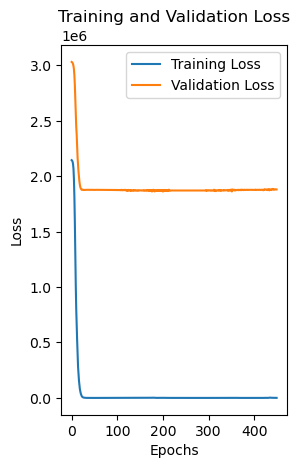

In [67]:
# Training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

4/4 [==============================] - 0s 1ms/step


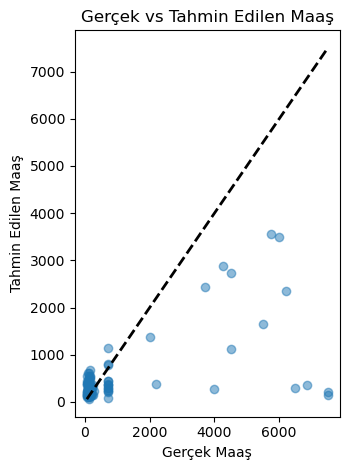

In [68]:
# Actual vs Predicted salaries
plt.subplot(1, 2, 2)
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Maaş')
plt.ylabel('Tahmin Edilen Maaş')
plt.title('Gerçek vs Tahmin Edilen Maaş')

plt.tight_layout()
plt.show()

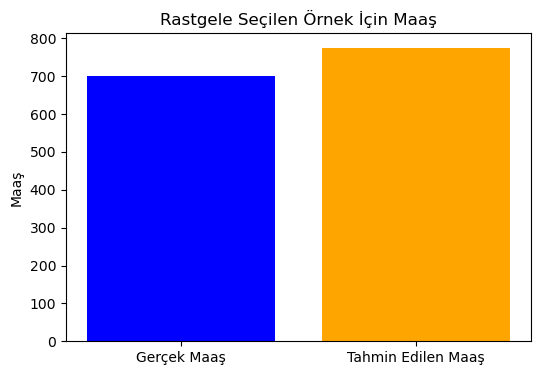

In [69]:
# Bar plot for the random sample
plt.figure(figsize=(6, 4))
plt.bar(['Gerçek Maaş', 'Tahmin Edilen Maaş'], [real_salary, predicted_salary[0][0]], color=['blue', 'orange'])
plt.title('Rastgele Seçilen Örnek İçin Maaş')
plt.ylabel('Maaş')
plt.show()